# Predicting Customer Churn in python: Tuning the model

Having completed exploring and preprocessing data, it's now time to build our classifier and make predictions.

Supervised Machine Learning Primer:
* Goal: Predict wether or not a customer will churn
* Target Variable: 'Churn'
* Supervised machine learning
* Learn from historical (training) data to make new predictions




This will be a classification problem.
* Logistic regression will be a good base model.
    * It offers simplicity and interpretability.
    * However, it is not flexible enough to capture more complex relationships in our dataset. 

* Random Forests are a good next step. 
    * They have high performance 
    * but offer limited interpretability. 

* Support Vector Machines are another option. 
    * They generally perform well, 
    * but are inefficient trainers and are not very interpretable.

We will have a chance to try all these models in the exercises. 

## The Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
base_df=pd.read_csv('./telco_preprocessed.csv')
base_df

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,Avg_Night_Calls
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.689011
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.469903
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.563462
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.212360
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.544628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,215.5,279.1,9.9,2,0,0,1,77,26.55,126,18.32,83,12.56,6,2.67,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.362651
3329,68,0,231.1,153.4,191.3,9.6,3,0,0,0,57,39.29,55,13.04,123,8.61,4,2.59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.555285
3330,28,0,180.8,288.8,191.9,14.1,2,0,0,0,109,30.74,58,24.55,91,8.64,6,3.81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.108791
3331,184,0,213.8,159.6,139.2,5.0,2,0,1,0,105,36.35,84,13.57,137,6.26,10,1.35,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.016058


In [3]:
features=['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge',
       'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge','Churn']

In [4]:
telco_df=base_df[features]

In [5]:
telco_df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73,0


In [6]:
print(len(telco_df.index))

3333


# Creating train and test sets

In [7]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco_df.drop('Churn', axis=1)

# Create target variable
y = telco_df['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
X_train.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
238,215,0,83.6,120.9,226.6,10.7,0,0,0,148,14.21,91,10.28,110,10.20,9,2.89
1238,147,24,219.9,208.5,352.5,8.1,3,1,1,118,37.38,116,17.72,111,15.86,4,2.19
3268,84,0,289.1,233.8,223.5,12.7,2,0,0,100,49.15,97,19.87,148,10.06,2,3.43
1498,50,0,154.7,298.0,210.2,11.1,0,0,0,102,26.30,108,25.33,95,9.46,3,3.00
2764,123,23,245.0,265.0,239.7,14.9,2,0,1,88,41.65,105,22.53,108,10.79,3,4.02


## Tuning the number of features

In [9]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the hyperparameter grid
param_grid = {'max_features': ['auto', 'sqrt', 'log2']}

# Call GridSearchCV
clf=RandomForestClassifier()
grid_search = GridSearchCV(clf, param_grid)

# Fit the model

grid_search.fit(X, y)

# Print the optimal parameters
print(grid_search.best_params_)

{'max_features': 'log2'}


## Tuning other hyperparameters

In [10]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid)

# Fit the model
grid_search.fit(X,y)
print(grid_search.best_params_)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10}


## Randomized search

As the hyperparameter grid gets larger, grid search becomes slower. 

In order to solve this problem, instead of trying out every single combination of values, we could randomly jump around the grid and try different combinations. There's a small possibility we may miss the best combination, but we would save a lot of time, or be able to tune more hyperparameters in the same amount of time.

In [11]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import random

# Create the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": [random.randint(1, 11)],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_dist)

# Fit the model
random_search.fit(X,y)

# Print best parameters
print(random_search.best_params_)

/home/mariana/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'max_features': 2, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}


# Feature importances

Tree-based methods such as random forests allow us to calculate feature importances, which are scores representing how much each feature contributes to a prediction. Visualizing these feature importances is an effective way to communicate results to stakeholders. It can inform which features are important in driving churn and which features can be removed from the model.

**Interpretability vs accuracy**

Recall from the previous chapter that different models have different strengths and weaknesses. For example, deep learning techniques tend to perform really well in many different domains, but the neural networks that underlie these techniques are very hard to interpret. In contrast, simpler techniques like logistic regression might not perform as well, but are easier to interpret, and this interpretability might be the difference between whether or not you get buy-in from stakeholders, so do not underestimate its importance. The value of a churn model is not only in helping you identify which customers are at risk of churning, but also what the drivers of churn are, so let's see how to compute feature importances for our random forest model.

## Visualizing feature importances

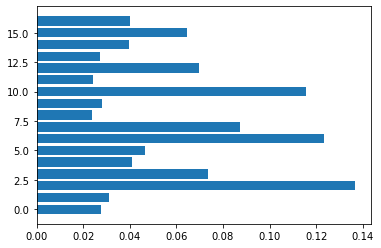

In [12]:
# Calculate feature importances
clf=RandomForestClassifier(max_features= 10, max_depth= None, criterion= 'entropy', bootstrap= True)
clf.fit(X,y)
importances = clf.feature_importances_

# Create plot
plt.barh(range(X.shape[1]), importances)
plt.show()

## Improving the plot

In order to make the plot more readable, we need to do achieve two goals:
* Re-order the bars in ascending order.
* Add labels to the plot that correspond to the feature names.

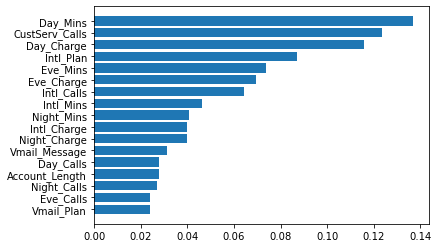

In [13]:
# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()

# Adding new features

In [24]:
new_df=pd.read_csv('./new_features.csv')
new_df.drop(columns=['index'],inplace=True)
new_df.head()

,Region_Code,Cost_Call,Total_Charge,Total_Minutes,Total_Calls,Min_Call
0,3,4.01,75.56,717.2,303,2.37
1,3,5.60,59.24,625.2,332,1.88
2,4,5.35,62.29,539.4,333,1.62
3,3,3.82,66.80,564.8,255,2.21
4,6,6.89,52.09,512.0,359,1.43


In [30]:
new_columns=new_df.columns
print(new_columns)

Index(['Region_Code', 'Cost_Call', 'Total_Charge', 'Total_Minutes',
       'Total_Calls', 'Min_Call'],
      dtype='object')


In [26]:
telco_df[new_columns]=new_df

/home/mariana/anaconda3/envs/DataCamp/lib/python3.8/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [32]:
telco_df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Churn,Region_Code,Cost_Call,Total_Charge,Total_Minutes,Total_Calls,Min_Call
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70,0,3,4.01,75.56,717.2,303,2.37
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70,0,3,5.60,59.24,625.2,332,1.88
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,4,5.35,62.29,539.4,333,1.62
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78,0,3,3.82,66.80,564.8,255,2.21
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73,0,6,6.89,52.09,512.0,359,1.43


In [33]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the data
clf.fit(X_train, y_train)

# Print the accuracy
print(clf.score(X_test,y_test))

0.945


## Computing other metrics

In [36]:
# Import f1_score
from sklearn.metrics import f1_score

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)
# Print the F1 score
print(f1_score(y_test,y_pred))

0.7968127490039841
